,n,x(n),w(n),xw(n),k,ω,xw(ejω)実部,xw(ejω)虚部,振幅
0,-16,1,0.0,0.0,-16,-6.28,8.00,-0.09,8.00
1,-15,1,0.0,0.0,-15,-5.89,0.99,-5.02,5.12
2,-14,1,0.0,0.0,-14,-5.50,-0.02,-0.01,0.02
3,-13,1,0.0,0.0,-13,-5.11,1.03,-1.48,1.80
4,-12,1,0.0,0.0,-12,-4.71,0.01,0.01,0.01
5,-11,1,0.0,0.0,-11,-4.32,1.00,-0.67,1.20
6,-10,1,0.0,0.0,-10,-3.93,-0.00,-0.01,0.01
7,-9,1,0.0,0.0,-9,-3.53,1.00,-0.21,1.02
8,-8,1,0.0,0.0,-8,-3.14,0.00,0.01,0.01
9,-7,1,0.0,0.0,-7,-2.75,1.00,0.20,1.02


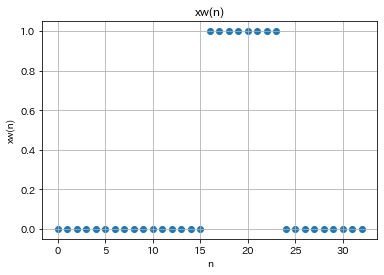

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

isSave = False

outputFile = 'timedomain.txt'
Fs = 8000
Fc = 1000
#x = lambda t: np.cos(2*np.pi*Fc*t)
x = lambda t: 1 # 演習問題３
def wn(x, n, p): return float(x*p) if(n >= lim_w[0]) and (n <= lim_w[1]) else 0.
lim = 16
lim_w = [0, 7]


xn = [round(x(n/Fs), 2) for n in range(lim+1)]
text = ''
data = {'n': [], 'x(n)': [], 'w(n)': [], 'xw(n)': [], 'k': [], 'ω': [], 'xw(ejω)実部': [], 'xw(ejω)虚部': [], '振幅': []}


for n in range(-1*lim, lim+1):
    text += f'{xn[n]}\n'
    data['n'] += [n]
    data['x(n)'] += [xn[n]]
    data['w(n)'] += [wn(1, n, 1)]
    data['xw(n)'] += [wn(xn[n], n, 1)]
    data['k'] += [n]
    data['ω'] += [round(2*np.pi*float(n)/lim, 2)]

for n in range(-1*lim, lim+1):
    real, imagin = 0., 0.
    for m in range(lim):
        real += data['xw(n)'][m+lim]*np.cos(-1*data['ω'][n+lim]*float(m))
        imagin += data['xw(n)'][m+lim]*np.sin(-1*data['ω'][n+lim]*float(m))
    data['xw(ejω)実部'] += [round(real,  2)]
    data['xw(ejω)虚部'] += [round(imagin, 2)]
    data['振幅'] += [round(np.sqrt(data['xw(ejω)実部'][n+lim]**2 + data['xw(ejω)虚部'][n+lim]**2), 2)]

df = pd.DataFrame(data)

if isSave:
    with open(outputFile, mode='w', encoding='utf8') as _outputFile:
        _outputFile.write(text)


plt.grid('on')
plt.title('xw(n)')
plt.xlabel('n')
plt.ylabel('xw(n)')
plt.scatter(range(lim*2+1), data['xw(n)'])

df

In [75]:
df[['k', 'ω', 'xw(ejω)実部', 'xw(ejω)実部', '振幅']]
#df[['n', 'x(n)', 'w(n)', 'xw(n)']][16:]

,k,ω,xw(ejω)実部,xw(ejω)実部,振幅
0,-16,-6.28,8.00,8.00,8.00
1,-15,-5.89,0.99,0.99,5.12
2,-14,-5.50,-0.02,-0.02,0.02
3,-13,-5.11,1.03,1.03,1.80
4,-12,-4.71,0.01,0.01,0.01
5,-11,-4.32,1.00,1.00,1.20
6,-10,-3.93,-0.00,-0.00,0.01
7,-9,-3.53,1.00,1.00,1.02
8,-8,-3.14,0.00,0.00,0.01
9,-7,-2.75,1.00,1.00,1.02


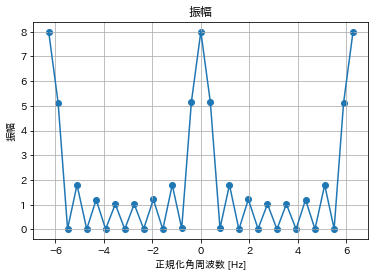

In [76]:
plt.grid('on')
plt.title('振幅')
plt.xlabel('正規化角周波数 [Hz]')
plt.ylabel('振幅')
plt.plot(df['ω'], df['振幅'])
plt.scatter(df['ω'], df['振幅'])